In [1]:
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
import datetime, os, sys, string, copy


#own modules
from evaluation.utils import db, tools
from evaluation.processing import tools_ec
from evaluation.visualization import plot
con = db.connect()
'done'


def plot_forward_backward(exp, 
                          y_col, 
                          x_col, 
                          data, 
                          marker_for='>', 
                          marker_back='<', 
                          back_for_col='scan_direction',
                          back_for_crit=1.5, 
                          **kwarg):
    return exp.dataset.plot(# forward
              y_col=y_col,
              x_col=x_col,
              data=data.loc[data.loc[:, back_for_col]<=back_for_crit],
              marker=marker_for,
             **kwarg
        )\
        .plot(# backward
             y_col=y_col,
             x_col=x_col,
             data=data.loc[data.loc[:, back_for_col]>=back_for_crit],
             marker=marker_back,
            **kwarg
        )\
        .return_dataset()
def scatter_forward_backward(exp, 
                          y_col, 
                          x_col, 
                          data, 
                             for_back=True,
                          marker_for='>', 
                          marker_back='<', 
                          back_for_col='scan_direction',
                          back_for_crit=1.5,
                             c='color',
                          color=None,
                             color_line=None,
                          #std=False,
                          **kwarg):
    print(kwarg)

    kwarg['zorder'] = kwarg['zorder'] if 'zorder' in kwarg.keys() else 10
    kwarg_line = kwarg.copy()
    kwarg_line['zorder'] = kwarg['zorder'] -1
    if color_line is not None:
        kwarg_line['color'] = color_line
    if 'marker' in kwarg_line.keys():
        del kwarg_line['marker']
    kwarg_scatter = kwarg.copy()
    if 'markersize' in kwarg_scatter.keys():
        del kwarg_scatter['markersize']
        kwarg_scatter['s'] = kwarg['markersize']
    if 'label' in kwarg_scatter.keys():
        del kwarg_scatter['label']
    exp = exp.dataset\
        .plot(y_col=y_col,
              x_col=x_col,
              data=data, 
              linestyle='-',
              marker='',
              #color=color_line,
              #c=None,
              **kwarg_line
             )\
        .return_dataset()

    if for_back:
        exp = exp.dataset\
            .scatter(# forward
                  y_col=y_col,
                  x_col=x_col,
                  data=data.loc[data.loc[:, back_for_col]<=back_for_crit],
                  marker=marker_for,
                c=c, 
                color=color,
                label='',
                **kwarg_scatter,

            )\
            .scatter(# backward
                 y_col=y_col,
                 x_col=x_col,
                 data=data.loc[data.loc[:, back_for_col]>=back_for_crit],
                 marker=marker_back,
                c=c,
                color=color,
                label='',
                **kwarg_scatter
            )\
            .return_dataset()
    else:
        exp = exp.dataset\
            .scatter(# forward
                  y_col=y_col,
                  x_col=x_col,
                  data=data,
                c=c, 
                color=color,
                label='',
                **kwarg_scatter
            )\
            .return_dataset()
    return exp




In [9]:
db.get_exp('''SELECT  *
                                    FROM hte_data.exp_ec_polcurve_expanded 
                                    WHERE name_user="n.roettcher"
                                     AND name_setup_sfc = "SFC_1"
                                     AND id_sample = 179
                                     AND DATE(t_start__timestamp) IN ("2024-03-26","2024-04-03","2024-04-04")
                                     AND NOT (DATE(t_start__timestamp) IN ("2024-03-26") 
                                                 AND id_sample = 179
                                                 AND id_ML IN (19, 64, 66))
                                     AND NOT id_exp_ec_polcurve IN (143, 146, 157)
                         ;''',).dataset.display()

Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_ec_polcurve : inserted new experiments = 0 , skipped existing experiments = 6 


,skip_id_data_eis_greater,ignore_overload_n_first_datapoints,changed_exp_parameters,t_inserted_data__timestamp,file_path_processing_plot,chosen_j_geo_col,number_datapoints_in_tail,number_steps,number_scan_direction,tafel_fit_left_limit__j_geo,tafel_fit_right_limit__j_geo,tafel_fit_m__V_dec,tafel_fit_m_sd__V_dec,tafel_fit_b__VvsRHE,tafel_fit_b_sd__VsRHE,tafel_fit_ResVar,tafel_fit_method,id_exp_sfc_ghold_first,id_exp_sfc_geis_first,id_exp_sfc,name_user,name_setup_sfc,name_setup_sfc_alias,name_setup_sfc_feature,name_setup_sfc_type,t_start__timestamp,t_end__timestamp,rawdata_path,rawdata_computer,id_ML,id_ML_technique,id_sample,id_spot,force__N,linaxis_x__mm,linaxis_y__mm,linaxis_z__mm,T_stage__degC,interrupted,labview_sfc_version,db_version,comment,ec_name_technique,ec_R_u__ohm,ec_iR_corr_in_situ__percent,ec_R_u_postdetermined__ohm,ec_R_u_determining_exp_ec,ec_R_u_determining_updated,ec_E_RE__VvsRHE,ec_name_RE,ec_name_RE_material,ec_name_RE_manufacturer,ec_name_RE_model,ec_name_CE,ec_name_CE_material,ec_name_CE_manufacturer,ec_name_CE_model,ec_name_CE_comment,ec_name_device,ec_id_control_mode,ec_id_ie_range,ec_id_vch_range,ec_id_ich_range,ec_id_vch_filter,ec_id_ich_filter,ec_id_ca_speed,ec_id_ie_stability,ec_id_sampling_mode,ec_ie_range_auto,ec_vch_range_auto,ec_ich_range_auto,samples_id_sample,samples_name_sample,samples_name_user,samples_t_manufactured__timestamp,samples_comment,samples_total_loading__mg_cm2,spots_id_spot,spots_spot_size__mm2,spots_pos_x__mm,spots_pos_y__mm,spots_comment,spots_total_loading__mg_cm2,spots_m_CL__mg,spots_m_Decal_plus_CL__mg,spots_m_Decal__mg,cv_name_technique,cv_E_initial__VvsRE,cv_E_apex1__VvsRE,cv_E_apex2__VvsRE,cv_E_final__VvsRE,cv_scanrate__mV_s,cv_stepsize__mV,cv_cycles,cv_E_initial__VvsOCP,cv_E_apex1__VvsOCP,cv_E_apex2__VvsOCP,cv_E_final__VvsOCP,ghold_name_technique,ghold_I_hold__A,ghold_t_hold__s,ghold_t_samplerate__s,gpulse_name_technique,gpulse_I_hold1__A,gpulse_I_hold2__A,gpulse_t_hold1__s,gpulse_t_hold2__s,gpulse_t_samplerate__s,gpulse_cycles,ocp_name_technique,ocp_t_hold__s,ocp_t_samplerate__s,peis_name_technique,peis_f_initial__Hz,peis_f_final__Hz,peis_E_dc__VvsRE,peis_E_amplitude__VvsRE,peis_R_initialguess__ohm,peis_points_per_decade,peis_E_dc__VvsOCP,phold_name_technique,phold_E_hold__VvsRE,phold_t_hold__s,phold_t_samplerate__s,phold_E_hold__VvsOCP,ppulse_name_technique,ppulse_E_hold1__VvsRE,ppulse_E_hold2__VvsRE,ppulse_t_hold1__s,ppulse_t_hold2__s,ppulse_t_samplerate__s,ppulse_cycles,ppulse_E_hold1__VvsOCP,ppulse_E_hold2__VvsOCP,ramp_name_technique,ramp_E_initial__VvsRE,ramp_E_final__VvsRE,ramp_scanrate__mV_s,ramp_stepsize__mV,ramp_cycles,ramp_E_initial__VvsOCP,ramp_E_final__VvsOCP,fc_top_name_flow_cell,fc_top_name_flow_cell_name_user,fc_top_name_flow_cell_material,fc_top_name_flow_cell_A_opening_ideal__mm2,fc_top_name_flow_cell_A_opening_real__mm2,fc_top_name_flow_cell_manufacture_date,fc_top_name_flow_cell_CAD_file,fc_top_name_flow_cell_opening_shape,fc_top_name_flow_cell_comment,fc_top_id_sealing,fc_top_id_sealing_name_user,fc_top_id_sealing_material,fc_top_id_sealing_A_sealing__mm2,fc_top_id_sealing_A_opening__mm2,fc_top_id_sealing_thickness__mm,fc_top_id_sealing_shaping_method,fc_top_id_sealing_comment,fc_top_id_PTL,fc_top_id_PTL_name_user,fc_top_id_PTL_material,fc_top_id_PTL_thickness__mm,fc_top_id_PTL_manufacturer,fc_top_id_PTL_A_PTL__mm2,fc_top_id_PTL_shaping_method,fc_top_id_PTL_comment,fc_bottom_name_flow_cell,fc_bottom_name_flow_cell_name_user,fc_bottom_name_flow_cell_material,fc_bottom_name_flow_cell_A_opening_ideal__mm2,fc_bottom_name_flow_cell_A_opening_real__mm2,fc_bottom_name_flow_cell_manufacture_date,fc_bottom_name_flow_cell_CAD_file,fc_bottom_name_flow_cell_opening_shape,fc_bottom_name_flow_cell_comment,fc_bottom_id_sealing,fc_bottom_id_sealing_name_user,fc_bottom_id_sealing_material,fc_bottom_id_sealing_A_sealing__mm2,fc_bottom_id_sealing_A_opening__mm2,fc_bottom_id_sealing_thickness__mm,fc_bottom_id_sealing_shaping_method,fc_bottom_id_sealing_comment,fc_bottom

# fig:ec_polcurve with 2 panels

Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_ec_polcurve : inserted new experiments = 6 , skipped existing experiments = 0 
Read data from "data_ec_polcurve_analysis" ...
SELECT * FROM data_ec_polcurve_analysis WHERE (`id_exp_ec_polcurve`) IN (138, 140, 153, 154, 155, 156) AND gooddata=1;
Done in  0:00:00.077653
 j_geo_col is deprecated. Please use the parameter j_geo_cols. 
 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


,id_exp_ec_polcurve,skip_id_data_eis_greater,ignore_overload_n_first_datapoints,changed_exp_parameters,t_inserted_data__timestamp,file_path_processing_plot,chosen_j_geo_col,number_datapoints_in_tail,number_steps,number_scan_direction,tafel_fit_left_limit__j_geo,tafel_fit_right_limit__j_geo,tafel_fit_m__V_dec,tafel_fit_m_sd__V_dec,tafel_fit_b__VvsRHE,tafel_fit_b_sd__VsRHE,tafel_fit_ResVar,tafel_fit_method,id_exp_sfc_ghold_first,id_exp_sfc_geis_first,id_exp_sfc,name_user,name_setup_sfc,name_setup_sfc_alias,name_setup_sfc_feature,name_setup_sfc_type,t_start__timestamp,t_end__timestamp,rawdata_path,rawdata_computer,id_ML,id_ML_technique,id_sample,id_spot,force__N,linaxis_x__mm,linaxis_y__mm,linaxis_z__mm,T_stage__degC,interrupted,labview_sfc_version,db_version,comment,ec_name_technique,ec_R_u__ohm,ec_iR_corr_in_situ__percent,ec_R_u_postdetermined__ohm,ec_R_u_determining_exp_ec,ec_R_u_determining_updated,ec_E_RE__VvsRHE,ec_name_RE,ec_name_RE_material,ec_name_RE_manufacturer,ec_name_RE_model,ec_name_CE,ec_name_CE_material,ec_name_CE_manufacturer,ec_name_CE_model,ec_name_CE_comment,ec_name_device,ec_id_control_mode,ec_id_ie_range,ec_id_vch_range,ec_id_ich_range,ec_id_vch_filter,ec_id_ich_filter,ec_id_ca_speed,ec_id_ie_stability,ec_id_sampling_mode,ec_ie_range_auto,ec_vch_range_auto,ec_ich_range_auto,samples_id_sample,samples_name_sample,samples_name_user,samples_t_manufactured__timestamp,samples_comment,samples_total_loading__mg_cm2,spots_id_spot,spots_spot_size__mm2,spots_pos_x__mm,spots_pos_y__mm,spots_comment,spots_total_loading__mg_cm2,spots_m_CL__mg,spots_m_Decal_plus_CL__mg,spots_m_Decal__mg,cv_name_technique,cv_E_initial__VvsRE,cv_E_apex1__VvsRE,cv_E_apex2__VvsRE,cv_E_final__VvsRE,cv_scanrate__mV_s,cv_stepsize__mV,cv_cycles,cv_E_initial__VvsOCP,cv_E_apex1__VvsOCP,cv_E_apex2__VvsOCP,cv_E_final__VvsOCP,ghold_name_technique,ghold_I_hold__A,ghold_t_hold__s,ghold_t_samplerate__s,gpulse_name_technique,gpulse_I_hold1__A,gpulse_I_hold2__A,gpulse_t_hold1__s,gpulse_t_hold2__s,gpulse_t_samplerate__s,gpulse_cycles,ocp_name_technique,ocp_t_hold__s,ocp_t_samplerate__s,peis_name_technique,peis_f_initial__Hz,peis_f_final__Hz,peis_E_dc__VvsRE,peis_E_amplitude__VvsRE,peis_R_initialguess__ohm,peis_points_per_decade,peis_E_dc__VvsOCP,phold_name_technique,phold_E_hold__VvsRE,phold_t_hold__s,phold_t_samplerate__s,phold_E_hold__VvsOCP,ppulse_name_technique,ppulse_E_hold1__VvsRE,ppulse_E_hold2__VvsRE,ppulse_t_hold1__s,ppulse_t_hold2__s,ppulse_t_samplerate__s,ppulse_cycles,ppulse_E_hold1__VvsOCP,ppulse_E_hold2__VvsOCP,ramp_name_technique,ramp_E_initial__VvsRE,ramp_E_final__VvsRE,ramp_scanrate__mV_s,ramp_stepsize__mV,ramp_cycles,ramp_E_initial__VvsOCP,ramp_E_final__VvsOCP,fc_top_name_flow_cell,fc_top_name_flow_cell_name_user,fc_top_name_flow_cell_material,fc_top_name_flow_cell_A_opening_ideal__mm2,fc_top_name_flow_cell_A_opening_real__mm2,fc_top_name_flow_cell_manufacture_date,fc_top_name_flow_cell_CAD_file,fc_top_name_flow_cell_opening_shape,fc_top_name_flow_cell_comment,fc_top_id_sealing,fc_top_id_sealing_name_user,fc_top_id_sealing_material,fc_top_id_sealing_A_sealing__mm2,fc_top_id_sealing_A_opening__mm2,fc_top_id_sealing_thickness__mm,fc_top_id_sealing_shaping_method,fc_top_id_sealing_comment,fc_top_id_PTL,fc_top_id_PTL_name_user,fc_top_id_PTL_material,fc_top_id_PTL_thickness__mm,fc_top_id_PTL_manufacturer,fc_top_id_PTL_A_PTL__mm2,fc_top_id_PTL_shaping_method,fc_top_id_PTL_comment,fc_bottom_name_flow_cell,fc_bottom_name_flow_cell_name_user,fc_bottom_name_flow_cell_material,fc_bottom_name_flow_cell_A_opening_ideal__mm2,fc_bottom_name_flow_cell_A_opening_real__mm2,fc_bottom_name_flow_cell_manufacture_date,fc_bottom_name_flow_cell_CAD_file,fc_bottom_name_flow_cell_opening_shape,fc_bottom_name_flow_cell_comment,fc_bottom_id_sealing,fc_bottom_id_sealing_name_user,fc_bottom_id_sealing_material,fc_bottom_id_sealing_A_sealing__mm2,fc_bottom_id_sealing_A_opening__mm2,fc_bottom_id_sealing_thickness__mm,fc_bottom_id_sealing_shaping_method,fc_bottom_id_sealin

I__A_std  already in data columns. Will drop the column calculate the std from standard deviation of averaging. Be sure that the previous std is not larger.
E_WE_uncompensated__VvsRHE_std  already in data columns. Will drop the column calculate the std from standard deviation of averaging. Be sure that the previous std is not larger.
Different number of datapoints averaged, check avg_counts column in data dataframe.
   Number of experiments averaged: [ 6 12  3]
Read data from "data_eis_analysis" ...
SELECT * FROM data_eis_analysis WHERE (`id_exp_sfc`) IN (12863, 12865, 12867, 12869, 12871, 12873, 12875, 12903, 12905, 12907, 12909, 12911, 12913, 12915, 12917, 12919, 12921, 12923, 12925, 13357, 13359, 13361, 13363, 13365, 13367, 13369, 13372, 13374, 13376, 13378, 13380, 13382, 13384, 13386, 13388, 13390, 13392, 13394, 13415, 13417, 13419, 13421, 13423, 13425, 13427, 13430, 13432, 13434, 13436, 13438, 13440, 13442, 13444, 13446, 13448, 13450, 13452);
Done in  0:00:00.063432
{'yerr_col': '

/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from $E_{\mathrm{uncompensated}}$ / V vs. RHE to $E$ / V vs. RHE
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')


{'yerr_col': 'E_WE__VvsRHE_std', 'ax': <AxesSubplot: xlabel='$j_\\mathrm{geo}$ / A cm$^{-2}$', ylabel='$E_{\\mathrm{uncompensated}}$ / V vs. RHE'>, 'label': '$E_{\\mathrm{WE,\\ HFR\\ free}}$', 'marker': 's', 'markersize': 3}
{'yerr_col': 'E_WE__VvsRHE_std', 'ax': <AxesSubplot: >, 'label': '', 'marker': 's', 'markersize': 3}
scientific should be default, if not to be developed
 Plot  fig_ec_polcurve.pdf  successfully saved 
![[Binder_export/Figures/Fig_3_S3/fig_ec_polcurve.pdf]] <br> *jupyter notebook source:* ![[Binder_export/Figures/Fig_3_S3/$$dummy_replaced_by_obsidian_jupyter$$]]


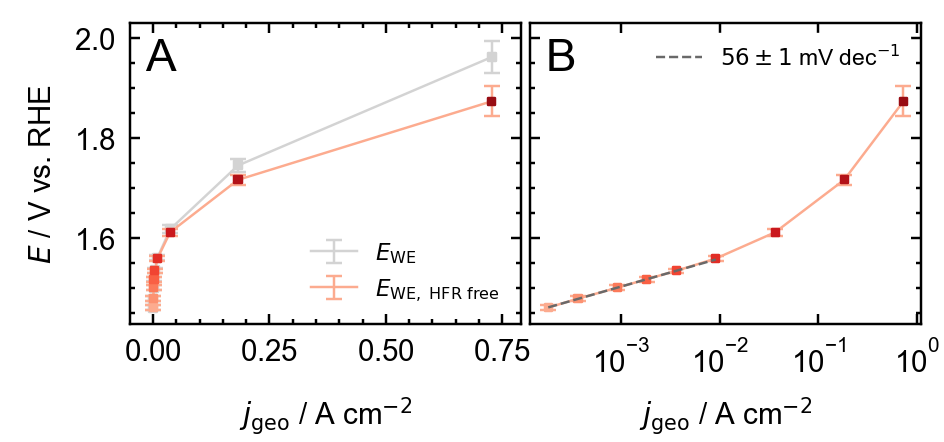

In [2]:
exp_ec_polcurve = db.get_exp('''SELECT  *
                                    FROM hte_data.exp_ec_polcurve_expanded 
                                    WHERE name_user="n.roettcher"
                                     AND name_setup_sfc = "SFC_1"
                                     AND id_sample = 179
                                     AND DATE(t_start__timestamp) IN ("2024-03-26","2024-04-03","2024-04-04")
                                     AND NOT (DATE(t_start__timestamp) IN ("2024-03-26") 
                                                 AND id_sample = 179
                                                 AND id_ML IN (19, 64, 66))
                                     AND NOT id_exp_ec_polcurve IN (143, 146, 157)
                         ;''',)
# subselect only first experiment
#exp_ec_polcurve = exp_ec_polcurve.iloc[[0, 1]]


overlay_cols = ['id_sample', 'id_spot']#, 'id_ML']
df_color = exp_ec_polcurve.reset_index().loc[:, overlay_cols].drop_duplicates()
df_color = df_color.dataset.add_column('color', 
                                            rowindexers=[
                                                        (df_color.id_sample == 179),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                                        (df_color.id_sample == 180),
                                                         (df_color.id_sample == 181),
                                                
                                                        #pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-14').date(),
                                                        ],
                                            values=['Reds', 'Blues', 'Greens'],
                                           cmap_min=0.3,cmap_max=0.9,#cmap_group='id_sample'
                                      )\
                                    .return_dataset()\
                                    .set_index(overlay_cols)


data_ec_polcurve = db.get_data(exp_ec_polcurve, 'data_ec_polcurve_analysis', add_cond='gooddata=1' )
exp_ec_polcurve.loc[:, 'counts_steps'] =  data_ec_polcurve.reset_index().groupby('id_exp_ec_polcurve').id_data_ec_polcurve.max()

data_ec_polcurve.loc[data_ec_polcurve.groupby('id_exp_ec_polcurve').I__A.idxmax().values, 'scan_direction'] = 1.5
exp_ec_polcurve, data_ec_polcurve = tools_ec.gravimetric_current(exp_ec_polcurve, data_ec_polcurve, j_geo_col='j__mA_cm2geo_fc_bottom_PTL')

exp_ec_polcurve.loc[:, 'date'] = pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date
exp_ec_polcurve = exp_ec_polcurve.sort_values(by=['loading__mg_Ir_cm2', 't_start__timestamp']).join(df_color, on=overlay_cols)\
                .dataset.add_column('label', values= exp_ec_polcurve.loading__mg_Ir_cm2.apply(lambda x: '{0:.1f}'.format(x))+' mg$_{\mathrm{Ir}}$ cm$^{-2}$'#+ ', spot: ' + exp_ec_polcurve.loc[:, 'id_spot'].astype(str)
                                                ,#+ ' ' + exp_ec_polcurve.date.astype(str),
                            rowindexer_first_of_group=['id_sample']#, 'id_spot']
                         )\
                .return_dataset()

exp_ec_polcurve.loc[:, 'type_protocol'] =  'SGEIS_'\
                                                +(data_ec_polcurve.groupby('id_exp_ec_polcurve')['I_dc__A'].min() * 1000).astype(str).str.rstrip('0').str.rstrip('.') \
                                                +'-'\
                                                + (data_ec_polcurve.groupby('id_exp_ec_polcurve')['I_dc__A'].max() * 1000).astype(str).str.rstrip('0').str.rstrip('.')



data_ec_polcurve.loc[:, 'j__A_cm2geo_fc_bottom_PTL'] = data_ec_polcurve.j__mA_cm2geo_fc_bottom_PTL / 1000
data_ec_polcurve.loc[:, 'j__A_mg_Ir_geo_fc_bottom_PTL'] = data_ec_polcurve.j__mA_mg_Ir_geo_fc_bottom_PTL / 1000
#data_ec_polcurve.loc[:, 'fc_bottom_id_PTL_A_PTL__mm2'] = exp_ec_polcurve.fc_bottom_id_PTL_A_PTL__mm2
data_ec_polcurve = data_ec_polcurve.join(exp_ec_polcurve.fc_bottom_id_PTL_A_PTL__mm2)
data_ec_polcurve.loc[:, 'R_u_geo__mohm_cm2'] = data_ec_polcurve.R_u__ohm * (data_ec_polcurve.fc_bottom_id_PTL_A_PTL__mm2/100) *1000
#data_ec_polcurve_forback_avg= data_ec_polcurve.groupby(['id_exp_ec_polcurve', 'id_current_step']).mean()\
#                                                        .join(data_ec_polcurve.groupby(['id_exp_ec_polcurve', 'id_current_step']).std(), rsuffix='_std')

data_ec_polcurve = data_ec_polcurve.join(exp_ec_polcurve.loc[:, ['id_sample', 'id_spot', 'counts_steps']], on='id_exp_ec_polcurve')



exp_ec_polcurve_avg, data_ec_polcurve_avg = plot.average(exp_ec_polcurve,
                                                        data_ec_polcurve, 
                                                         name_id_data_overlay_col=['I_dc__A']
                                                       )


exp_ec_nyquist = data_ec_polcurve.assign(id_exp_sfc = lambda row: row.id_exp_sfc_geis).reset_index().set_index('id_exp_sfc')
data_ec_nyquist = db.get_data(exp_ec_nyquist, 'data_eis_analysis')
#.assign(Z_real_geo__mohm_cm2 = lambda row: row.Z_real__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000,
#                                                                          minusZ_img_geo__mohm_cm2 = lambda row: row.minusZ_img__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000,
data_ec_nyquist.loc[:, 'Z_real_geo__mohm_cm2'] = data_ec_nyquist.Z_real__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000  
data_ec_nyquist.loc[:, 'minusZ_img_geo__mohm_cm2'] = data_ec_nyquist.minusZ_img__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000 


plot.manual_col_to_axis_label['Z_real_geo__mohm_cm2'] = '$Z_\\mathrm{real, geo}$ / m$\\Omega$ cm$^{2}$'
plot.manual_col_to_axis_label['minusZ_img_geo__mohm_cm2'] = '$-Z_\\mathrm{img, geo}$ / m$\\Omega$ cm$^{2}$'
plot.manual_col_to_axis_label['R_u_geo__mohm_cm2'] = '$HFR_\\mathrm{geo}$ / m$\\Omega$ cm$^{2}$'
plot.manual_col_to_axis_label['j__A_cm2geo_fc_bottom_PTL'] = '$j_\\mathrm{geo}$ / A cm$^{-2}$' #_{(\\mathrm{bottom\\ PTL})}




with plt.rc_context(plot.get_style(style='singleColumn',
                                   increase_fig_height=0.75,
                                   interactive=True,
                                   add_margins={'bottom':0.2, 'left':0.1}, #
                                   #add_margins_between_subplots={'hspace':2.5, 'wspace':2.5}
                                  )):
    plot_storage = plot.PlotDataStorage('fig_ec_polcurve', overwrite_existing=True)
    fig = plt.figure()
    #ax_total = sum([polcurve_geo, polcurve_grav, HFR, tafel, E_drift])

    gs = gridspec.GridSpec(1, 2)
    ax_polcurve = fig.add_subplot(gs[0, 0])
    ax_tafel = fig.add_subplot(gs[0, 1], sharey=ax_polcurve)
    
    #ax_Nyquist = fig.add_subplot(gs[1, 0])
    #ax_HFR = fig.add_subplot(gs[1, 1], sharex=ax_tafel)
    
    axs = [ax_polcurve, ax_tafel,]# ax_Nyquist, ax_HFR]
    

    #axs = [ax1, ax2]


    #x_col_j='j__A_cm2geo_fc_bottom_PTL',#'j__A_mg_Ir_geo_fc_bottom_PTL'#
    #y_col_E = 'E_WE__VvsRHE'
    #y_col_E = 'E_WE__VvsRHE'
    #y_col_ICPMS='S_number_trapz'
    #
    

    """
    # Nyquist only of forward scan
    exp_ec_nyquist = exp_ec_nyquist.loc[((exp_ec_nyquist.scan_direction <= 1.5) 
                                         & (exp_ec_nyquist.id_exp_ec_polcurve.isin([155, 156])))]\
                                   .sort_values('I_dc__A')
    exp_ec_nyquist.loc[:, 'label_only_first_last'] = 0
    exp_ec_nyquist.loc[exp_ec_nyquist.I_dc__A.idxmax(), 'label_only_first_last'] = 1
    exp_ec_nyquist = exp_ec_nyquist.dataset\
                    .add_column('color', 
                                #values='Reds',
                                rowindexers=[
                                    (exp_ec_nyquist.id_sample == 179),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                    (exp_ec_nyquist.id_sample == 180),
                                     (exp_ec_nyquist.id_sample == 181),

                                    #pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-14').date(),
                                    ],
                                values=['Reds', 'Blues', 'Greens'],
                                cmap_min=0.3,cmap_max=0.9,
                                cmap_group='I_dc__A'
                               )\
                    .add_column('label', 
                            #values='Reds',
                            values=tools.round_digits_df(exp_ec_nyquist, col_value='j__mA_cm2geo_fc_bottom_PTL', digits=2, return_type='str',  return_type_list='pd.Series')+' mA cm$^{-2}$', #_\mathrm{geo}
                               rowindexer_first_of_group=[ 'label_only_first_last']
                               )\
                    .plot(
                        x_col='Z_real_geo__mohm_cm2', #'Z_real__ohm',#
                      y_col='minusZ_img_geo__mohm_cm2', #'minusZ_img__ohm',#
                      data=data_ec_nyquist.loc[data_ec_nyquist.index.get_level_values('id_data_eis')>1, :], 
                      ax=ax_Nyquist,
                     #marker='s',
                     # markersize=1, 
                      linestyle='-', 
                      #label='',
    )\
    .return_dataset()

    """


    # points
    #data_ec_polcurve = data_ec_polcurve.drop(columns=['color'],errors='ignore').join(exp_ec_nyquist.color, on='id_exp_sfc_geis')
    exp_ec_polcurve_avg = exp_ec_polcurve_avg.drop(columns=['label', ])\
                    .dataset\
                    .add_column('color', 
                            #values='Reds',
                            values='Reds',
                               cmap_min=0.3,cmap_max=0.9,)\
                    .return_dataset()
    data_ec_polcurve_avg = data_ec_polcurve_avg\
                    .dataset\
                    .add_column('color', 
                            #values='Reds',
                            values='Reds',
                               cmap_min=0.3,cmap_max=0.9,)\
                    .return_dataset()
    #data_ec_polcurve_avg = data_ec_polcurve_avg.drop(columns=['color', 'I_dc__A'],errors='ignore').join(exp_ec_nyquist.groupby('I_dc__A').first().color, on='I_dc__A')
    exp_ec_polcurve_avg = scatter_forward_backward(exp_ec_polcurve_avg,
                                                   y_col='E_WE_uncompensated__VvsRHE', 
                                                   yerr_col='E_WE_uncompensated__VvsRHE_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve_avg, 
                                                   ax=ax_polcurve,
                                                   label='$E_{\mathrm{WE}}$',
                                                   c='lightgrey',
                                                   color_line='lightgrey',
                                                   zorder=0,
                                                   for_back=False,
                                                   marker='s',
                                                   markersize=3,
                                               )
    
    exp_ec_polcurve_avg = scatter_forward_backward(exp_ec_polcurve_avg,
                                                   y_col='E_WE__VvsRHE', 
                                                   yerr_col='E_WE__VvsRHE_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve_avg,
                                                   ax=ax_polcurve,
                                                   label='$E_{\mathrm{WE,\ HFR\ free}}$',
                                                   c='color',
                                                   for_back=False,
                                                   marker='s',
                                                   markersize=3,
                                                  )   
                                                  
    # tafel
    exp_ec_polcurve_avg = scatter_forward_backward(exp_ec_polcurve_avg,
                                                   y_col='E_WE__VvsRHE', 
                                                   yerr_col='E_WE__VvsRHE_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve_avg, 
                                                   ax=ax_tafel,
                                                   label='',
                                                   c='color',
                                                   for_back=False,
                                                   marker='s',
                                                   markersize=3,
                                                  )

    """
    # HFR
    exp_ec_polcurve_avg = scatter_forward_backward(exp_ec_polcurve_avg,
                                                   y_col='R_u_geo__mohm_cm2', 
                                                   yerr_col='R_u_geo__mohm_cm2_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve_avg, 
                                                   ax=ax_HFR,
                                                   label='',
                                                   c='color',
                                                   for_back=False,
                                                   marker='s',
                                                   markersize=3,
                                                  )
    """
    tafel_fit_x_lims = np.array([exp_ec_polcurve.loc[exp_ec_polcurve.type_protocol == 'SGEIS_0.01-0.5', :].tafel_fit_left_limit__j_geo.mean(),
                                exp_ec_polcurve.loc[exp_ec_polcurve.type_protocol == 'SGEIS_0.01-0.5', :].tafel_fit_right_limit__j_geo.mean()]) 
    tafel_fit_params = np.array([exp_ec_polcurve.loc[exp_ec_polcurve.type_protocol == 'SGEIS_0.01-0.5', :].tafel_fit_m__V_dec.mean(),
                                exp_ec_polcurve.loc[exp_ec_polcurve.type_protocol == 'SGEIS_0.01-0.5', :].tafel_fit_b__VvsRHE.mean()])
    tafel_fit_y = plot.tafel_func(tafel_fit_params, tafel_fit_x_lims)
    ax_tafel.plot(tafel_fit_x_lims/1000,  # j_geo in mA - transformation of units after tafel function is applied - tafel fit parameters with mA/cm2, y-axis offset (b of fit) depends on unit 
                  tafel_fit_y,
                  label= #'m$_\mathrm{Tafel}$ = \n'+
                          (tools.round_significant_digits(
                            exp_ec_polcurve.loc[exp_ec_polcurve.type_protocol == 'SGEIS_0.01-0.5', :].tafel_fit_m__V_dec.mean()*1000,
                            exp_ec_polcurve.loc[exp_ec_polcurve.type_protocol == 'SGEIS_0.01-0.5', :].tafel_fit_m__V_dec.std()*1000,
                                return_type='str'
                        )) + ' mV dec$^{-1}$',
                  color='dimgray', 
                  linestyle='--',
                  zorder=100
                 )
    

    
    ax_polcurve.legend(fontsize=5.5, loc='lower right')#, bbox_to_anchor=(1, 0.0))
    ax_tafel.legend(fontsize=5.5, loc='upper right')#, bbox_to_anchor=(1, 0.0))
    
    ax_polcurve.set_xlim((-0.05, 0.79))
    ax_polcurve.set_ylim((1.4276047103762728, 2.03))#(1.4, 2.)) #
   
    ax_tafel.set_xscale('log')
    ax_tafel.set_ylabel('')
    ax_tafel.tick_params(axis='y', which='both', labelleft=False)
    plot.log_axis_xticklabel(ax_tafel, style='scientific')
    
    plot_labels = list(string.ascii_uppercase)[:len(axs)]
    for ax, letter in zip(axs, plot_labels):
        ax.text(0.04, 0.95, letter, 
                    horizontalalignment='left', 
                    verticalalignment='top', 
                    transform=ax.transAxes,
                    fontsize=11)
    
    """
    ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(lambda x, pos: ("%.3f" %x).rstrip('.0'))
    
    ax1.set_xlabel('')
    if x_col_EC_ICPMS == 'j__A_cm2geo_fc_bottom_PTL':
        ax2.set_xlabel('$j_\mathrm{geo}$ / A cm$_{(\mathrm{PTL})}^{-2}$')
    elif x_col_EC_ICPMS == 'j__A_mg_Ir_geo_fc_bottom_PTL':
        ax2.set_xlabel('$j_\mathrm{grav}$ / A mg$_{\mathrm{Ir}}^{-1}$')
    ax2.set_ylabel('S-number =  $n_{\mathrm{O}_2} / n_{\mathrm{Ir}}$')
    ax1.legend()
    ax2.set_ylim([0.3e6, 4e7])#[1.4,1.7])
    
    ##
    
    #ax3.set_ylim([1.4,2])#[1.4,1.7])
    #ax3.set_xlim([1, 650])
    #axs[0].legend()
    #ax2.legend()
    #ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2))
    #ax2.legend()#loc='upper left', bbox_to_anchor=(0, -0.2))
    #ax1.legend()

    #ax3.legend(loc='upper left', bbox_to_anchor=(0, -0.35), fontsize=4)

    #plt.tight_layout()
    fig.align_ylabels(axs)
    #fig.savefig('hCCM9_SGEIS_overview_HFR.svg')
    """
    #for ax in axs:
    #    ax.set_xlabel(ax.get_xlabel(),  labelpad=0.8)
    #    ax.set_ylabel(ax.get_ylabel(),  labelpad=0.8)

    fig.align_ylabels([ax_polcurve, ax_tafel])
    #fig.align_ylabels([ax_polcurve, ax_Nyquist])
    #fig.align_ylabels([ax_tafel, ax_HFR])
    fig.align_xlabels([ax_polcurve, ax_tafel])
    #fig.align_xlabels([ax_Nyquist, ax_HFR])
    plot_storage.export(fig, plot_format='pdf')
    #plot_storage.export(fig, plot_format='svg')
    plt.show()

# sfig:ec_polcurve_single_experiments

Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_ec_polcurve : inserted new experiments = 0 , skipped existing experiments = 6 
Read data from "data_ec_polcurve_analysis" ...
SELECT * FROM data_ec_polcurve_analysis WHERE (`id_exp_ec_polcurve`) IN (138, 140, 153, 154, 155, 156) AND gooddata=1;
Done in  0:00:00.022190
 j_geo_col is deprecated. Please use the parameter j_geo_cols. 
Read data from "data_eis_analysis" ...
SELECT * FROM data_eis_analysis WHERE (`id_exp_sfc`) IN (12863, 12865, 12867, 12869, 12871, 12873, 12875, 12903, 12905, 12907, 12909, 12911, 12913, 12915, 12917, 12919, 12921, 12923, 12925, 13357, 13359, 13361, 13363, 13365, 13367, 13369, 13372, 13374, 13376, 13378, 13380, 13382, 13384, 13386, 13388, 13390, 13392, 13394, 13415, 13417, 13419, 13421, 13423, 13425, 13427, 13430, 13432, 13434, 13436, 13438, 13440, 13442, 13444, 13446, 13448, 13450, 13452);
Done in  0:00:00.063882
{'ax': <AxesSubplot: >, 'label': ''}
{'ax': <AxesSubplot: >, 'zord

/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color

{'ax': <AxesSubplot: xlabel='$j_\\mathrm{geo}$ / A cm$_{(\\mathrm{bottom\\ PTL})}^{-2}$', ylabel='$E_{\\mathrm{uncompensated}}$ / V vs. RHE'>}


/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color

{'ax': <AxesSubplot: >, 'label': ''}


/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color. c is used, color is ignored')
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2466: UserWarning: For scatter plots either use c or color. c is used, color is ignored
  warnings.warn('For scatter plots either use c or color

scientific should be default, if not to be developed
 Plot  sfig_ec_polcurve_single_experiments.pdf  successfully saved 
![[Binder_export/Figures/Fig_3_S3/sfig_ec_polcurve_single_experiments.pdf]] <br> *jupyter notebook source:* ![[Binder_export/Figures/Fig_3_S3/$$dummy_replaced_by_obsidian_jupyter$$]]


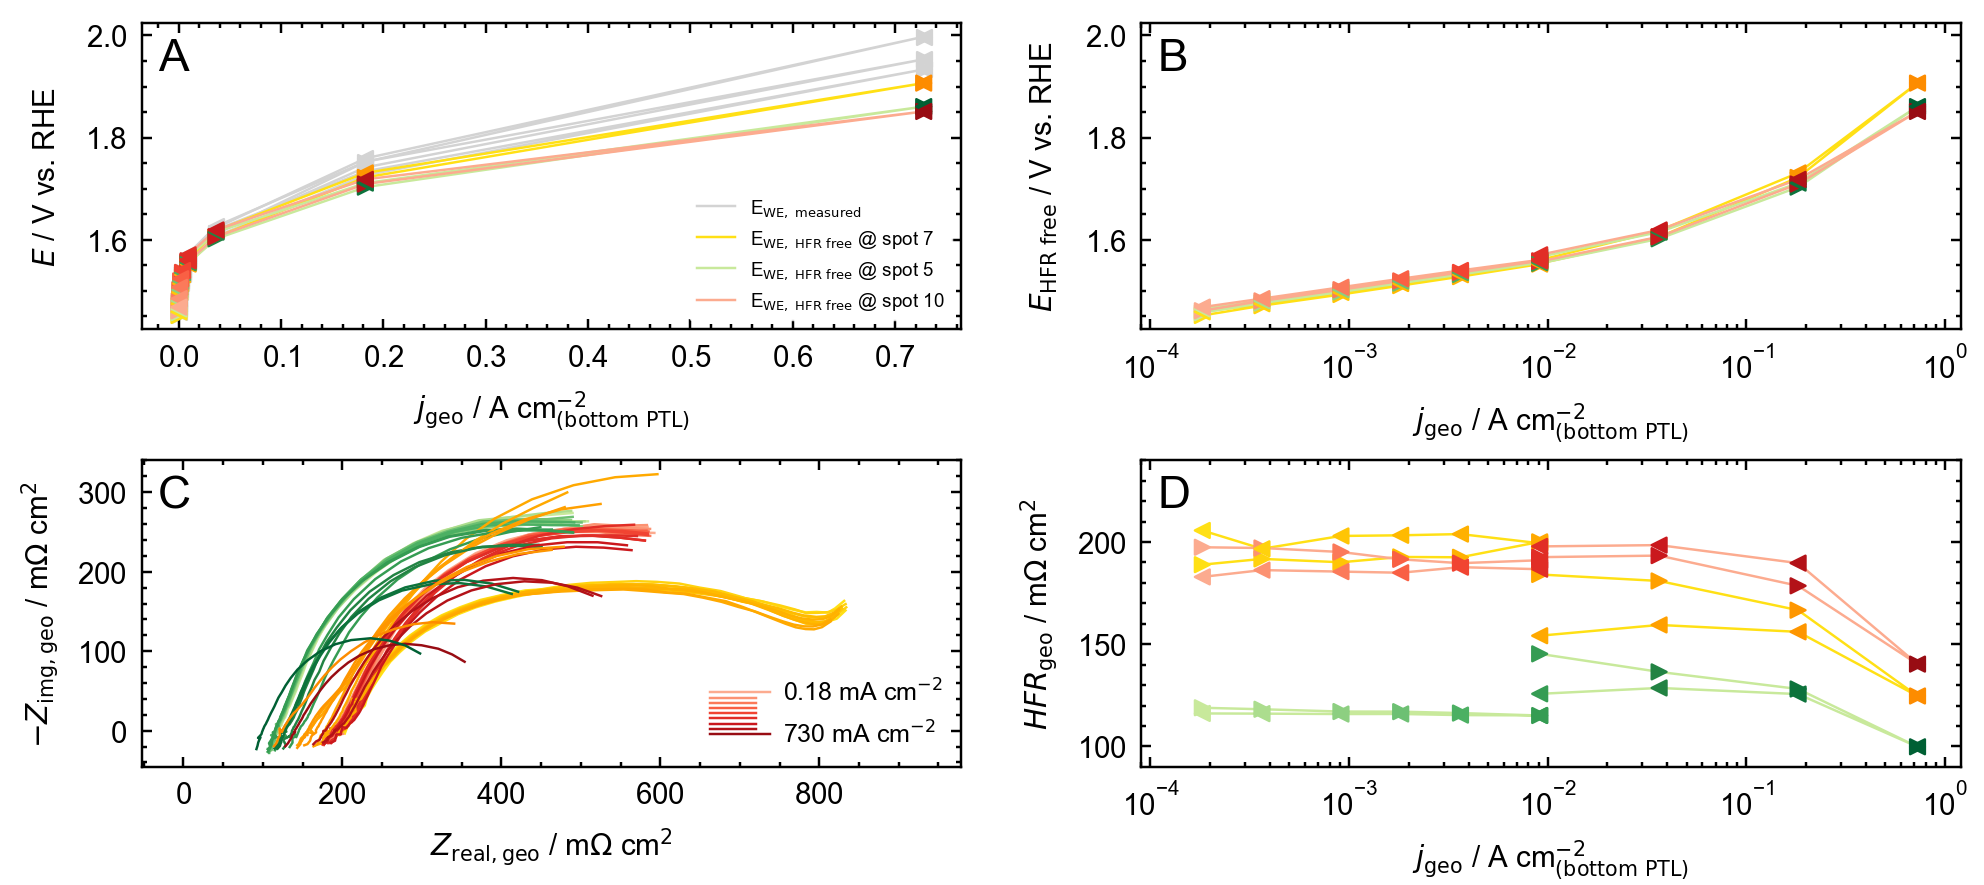

In [3]:
exp_ec_polcurve = db.get_exp('''SELECT  *
                                    FROM hte_data.exp_ec_polcurve_expanded 
                                    WHERE name_user="n.roettcher"
                                     AND name_setup_sfc = "SFC_1"
                                     AND id_sample = 179
                                     AND DATE(t_start__timestamp) IN ("2024-03-26","2024-04-03","2024-04-04")
                                     AND NOT (DATE(t_start__timestamp) IN ("2024-03-26") 
                                                 AND id_sample = 179
                                                 AND id_ML IN (19, 64, 66))
                                     AND NOT id_exp_ec_polcurve IN (143, 146, 157)
                         ;''',)
# subselect only first experiment
#exp_ec_polcurve = exp_ec_polcurve.iloc[[0, 1]]


overlay_cols = ['id_sample', 'id_spot']#, 'id_ML']
df_color = exp_ec_polcurve.reset_index().loc[:, overlay_cols].drop_duplicates()
df_color = df_color.dataset.add_column('color', 
                                            rowindexers=[
                                                        (df_color.id_sample == 179),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                                        (df_color.id_sample == 180),
                                                        (df_color.id_sample == 181),
                                    ],
                                values=['Reds', 'Blues', 'Greens'],
                                           cmap_min=0.3,cmap_max=0.9,#cmap_group='id_sample'
                                      )\
                                    .return_dataset()\
                                    .set_index(overlay_cols)


data_ec_polcurve = db.get_data(exp_ec_polcurve, 'data_ec_polcurve_analysis', add_cond='gooddata=1' )
exp_ec_polcurve.loc[:, 'counts_steps'] =  data_ec_polcurve.reset_index().groupby('id_exp_ec_polcurve').id_data_ec_polcurve.max()

data_ec_polcurve.loc[data_ec_polcurve.groupby('id_exp_ec_polcurve').I__A.idxmax().values, 'scan_direction'] = 1.5
exp_ec_polcurve, data_ec_polcurve = tools_ec.gravimetric_current(exp_ec_polcurve, data_ec_polcurve, j_geo_col='j__mA_cm2geo_fc_bottom_PTL')

exp_ec_polcurve.loc[:, 'date'] = pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date
exp_ec_polcurve = exp_ec_polcurve.sort_values(by=['loading__mg_Ir_cm2', 't_start__timestamp']).join(df_color, on=overlay_cols)\
                .dataset.add_column('label', values= exp_ec_polcurve.loading__mg_Ir_cm2.apply(lambda x: '{0:.1f}'.format(x))+' mg$_{\mathrm{Ir}}$ cm$^{-2}$'#+ ', spot: ' + exp_ec_polcurve.loc[:, 'id_spot'].astype(str)
                                                ,#+ ' ' + exp_ec_polcurve.date.astype(str),
                            rowindexer_first_of_group=['id_sample']#, 'id_spot']
                         )\
                .return_dataset()



data_ec_polcurve.loc[:, 'j__A_cm2geo_fc_bottom_PTL'] = data_ec_polcurve.j__mA_cm2geo_fc_bottom_PTL / 1000
data_ec_polcurve.loc[:, 'j__A_mg_Ir_geo_fc_bottom_PTL'] = data_ec_polcurve.j__mA_mg_Ir_geo_fc_bottom_PTL / 1000
#data_ec_polcurve.loc[:, 'fc_bottom_id_PTL_A_PTL__mm2'] = exp_ec_polcurve.fc_bottom_id_PTL_A_PTL__mm2
data_ec_polcurve = data_ec_polcurve.join(exp_ec_polcurve.fc_bottom_id_PTL_A_PTL__mm2)
data_ec_polcurve.loc[:, 'R_u_geo__mohm_cm2'] = data_ec_polcurve.R_u__ohm * (data_ec_polcurve.fc_bottom_id_PTL_A_PTL__mm2/100) *1000
#data_ec_polcurve_forback_avg= data_ec_polcurve.groupby(['id_exp_ec_polcurve', 'id_current_step']).mean()\
#                                                        .join(data_ec_polcurve.groupby(['id_exp_ec_polcurve', 'id_current_step']).std(), rsuffix='_std')

data_ec_polcurve = data_ec_polcurve.join(exp_ec_polcurve.loc[:, ['id_sample', 'id_spot', 'counts_steps']], on='id_exp_ec_polcurve')



exp_ec_nyquist = data_ec_polcurve.assign(id_exp_sfc = lambda row: row.id_exp_sfc_geis).reset_index().set_index('id_exp_sfc')
data_ec_nyquist = db.get_data(exp_ec_nyquist, 'data_eis_analysis')
#.assign(Z_real_geo__mohm_cm2 = lambda row: row.Z_real__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000,
#                                                                          minusZ_img_geo__mohm_cm2 = lambda row: row.minusZ_img__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000,
data_ec_nyquist.loc[:, 'Z_real_geo__mohm_cm2'] = data_ec_nyquist.Z_real__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000  
data_ec_nyquist.loc[:, 'minusZ_img_geo__mohm_cm2'] = data_ec_nyquist.minusZ_img__ohm * (exp_ec_nyquist.fc_bottom_id_PTL_A_PTL__mm2/100) *1000 


plot.manual_col_to_axis_label['Z_real_geo__mohm_cm2'] = '$Z_\\mathrm{real, geo}$ / m$\\Omega$ cm$^{2}$'
plot.manual_col_to_axis_label['minusZ_img_geo__mohm_cm2'] = '$-Z_\\mathrm{img, geo}$ / m$\\Omega$ cm$^{2}$'
plot.manual_col_to_axis_label['R_u_geo__mohm_cm2'] = '$HFR_\\mathrm{geo}$ / m$\\Omega$ cm$^{2}$'
plot.manual_col_to_axis_label['j__A_cm2geo_fc_bottom_PTL'] = '$j_\\mathrm{geo}$ / A cm$_{(\\mathrm{bottom\\ PTL})}^{-2}$'




with plt.rc_context(plot.get_style(style='doubleColumn',#'singleColumn',
                                   fig_size={'width': 16.8, 'height': 5},
                                   increase_fig_height=1.5,
                                   interactive=True,
                                   add_margins={'bottom':0.2, 'left':0.2}, #
                                   add_margins_between_subplots={'hspace':3, 'wspace':3.5}
                                  )):
    plot_storage = plot.PlotDataStorage('sfig_ec_polcurve_single_experiments', overwrite_existing=True)
    fig = plt.figure()
    #ax_total = sum([polcurve_geo, polcurve_grav, HFR, tafel, E_drift])

    gs = gridspec.GridSpec(2, 2)
    ax_polcurve = fig.add_subplot(gs[0, 0])
    ax_tafel = fig.add_subplot(gs[0, 1], sharey=ax_polcurve)
    
    ax_Nyquist = fig.add_subplot(gs[1, 0])
    ax_HFR = fig.add_subplot(gs[1, 1], sharex=ax_tafel)
    
    axs = [ax_polcurve, ax_tafel, ax_Nyquist, ax_HFR]
    

    #axs = [ax1, ax2]


    #x_col_j='j__A_cm2geo_fc_bottom_PTL',#'j__A_mg_Ir_geo_fc_bottom_PTL'#
    #y_col_E = 'E_WE__VvsRHE'
    #y_col_E = 'E_WE__VvsRHE'
    #y_col_ICPMS='S_number_trapz'
    #
    #exp_ec_nyquist = exp_ec_nyquist.loc[((exp_ec_nyquist.scan_direction <= 1.5) 
    #                                     #& (exp_ec_nyquist.id_exp_ec_polcurve.isin([155, 156]))
    #                                    )
    #                                   ]\
    #                               .sort_values('I_dc__A')
    exp_ec_nyquist = exp_ec_nyquist.sort_values('I_dc__A')
    exp_ec_nyquist.loc[:, 'label_only_first_last'] = 0
    exp_ec_nyquist.loc[exp_ec_nyquist.loc[exp_ec_nyquist.id_spot==10, :].I_dc__A.idxmax(), 'label_only_first_last'] = 1
    exp_ec_nyquist = exp_ec_nyquist.dataset\
                    .add_column('color', 
                                #values='Reds',
                                rowindexers=[
                                    #(exp_ec_nyquist.id_sample == 179),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                    #(exp_ec_nyquist.id_sample == 180),
                                     #(exp_ec_nyquist.id_sample == 181),
                                    (exp_ec_nyquist.id_spot == 5),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                    (exp_ec_nyquist.id_spot == 7),
                                     (exp_ec_nyquist.id_spot == 10),
                                    #pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-14').date(),
                                    ],
                                values=['YlGn', 'Wistia', 'Reds'],
                                cmap_min=0.3,cmap_max=0.9,
                                cmap_group='I_dc__A'
                               )\
                    .add_column('label', 
                            #values='Reds',
                            values=tools.round_digits_df(exp_ec_nyquist, col_value='j__mA_cm2geo_fc_bottom_PTL', digits=2, return_type='str',  return_type_list='pd.Series')+' mA cm$^{-2}$', #_\mathrm{geo}
                               rowindexer_first_of_group=[ 'label_only_first_last']
                               )\
                    .plot(
                        x_col='Z_real_geo__mohm_cm2', #'Z_real__ohm',#
                      y_col='minusZ_img_geo__mohm_cm2', #'minusZ_img__ohm',#
                      data=data_ec_nyquist.loc[data_ec_nyquist.index.get_level_values('id_data_eis')>1, :], 
                      ax=ax_Nyquist,
                     #marker='s',
                     # markersize=1, 
                      linestyle='-', 
                      label='',)\
    .return_dataset()




    exp_ec_polcurve = exp_ec_polcurve.dataset\
                    .add_column('color', 
                            #values='Reds',
                            rowindexers=[
                                #(exp_ec_polcurve.id_sample == 179),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                #(exp_ec_polcurve.id_sample == 180),
                                # (exp_ec_polcurve.id_sample == 181),
                                    (exp_ec_polcurve.id_spot == 5),# & (pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-19').date())), 
                                    (exp_ec_polcurve.id_spot == 7),
                                     (exp_ec_polcurve.id_spot == 10),
                                    #pd.to_datetime(exp_ec_polcurve.t_start__timestamp).dt.date == pd.to_datetime('2024-03-14').date(),
                                    ],
                                values=['YlGn', 'Wistia', 'Reds'],
                            cmap_min=0.3,cmap_max=0.9, 
                                cmap_group=['id_sample', 'id_spot'],#'id_sample'
                               )\
            .add_column('label', values=exp_ec_polcurve.index)\
    .return_dataset()

    # points
    data_ec_polcurve = data_ec_polcurve.drop(columns=['color'],errors='ignore').join(exp_ec_nyquist.color, on='id_exp_sfc_geis')
    exp_ec_polcurve = scatter_forward_backward(exp_ec_polcurve,
                          y_col='R_u_geo__mohm_cm2', 
                          x_col='j__A_cm2geo_fc_bottom_PTL', 
                          data=data_ec_polcurve, 
                          ax=ax_HFR,
                          #markersize=2, 
                          #linestyle='-', 
                          label='',
                          c='color',
                         )
    

    
    exp_ec_polcurve = scatter_forward_backward(exp_ec_polcurve.dataset.add_column('label', 
                                                                                  values='E$_{\mathrm{WE,\ measured}}$',
                                                                                  rowindexer_first_of_group='id_sample').return_dataset(),
                                                   y_col='E_WE_uncompensated__VvsRHE', 
                                                   #yerr_col='E_WE_uncompensated__VvsRHE_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve, 
                                                   ax=ax_polcurve,
                                                   #label='E$_{\mathrm{WE,\ measured}}$',
                                                   c='lightgrey',
                                                   color_line='lightgrey',
                                                   zorder=0,
                                                   #marker='s',
                                                   #markersize=3,
                                               )
    exp_ec_polcurve = scatter_forward_backward(exp_ec_polcurve.dataset.add_column('label', 
                                                                                  values='E$_{\mathrm{WE,\ HFR\ free}}$ @ spot '+exp_ec_polcurve.id_spot.astype(str), 
                                                                                  rowindexer_first_of_group='id_spot').return_dataset(),
                                                   y_col='E_WE__VvsRHE', 
                                                   #yerr_col='E_WE__VvsRHE_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve,
                                                   ax=ax_polcurve,
                                                   #label='',#'E$_{\mathrm{WE,\ HFR\ free}}$',
                                                   c='color',
                                                   #marker='s',
                                                   #markersize=3,
                                                  )    
    exp_ec_polcurve = scatter_forward_backward(exp_ec_polcurve,
                                                   y_col='E_WE__VvsRHE', 
                                                   #yerr_col='E_WE__VvsRHE_std', 
                                                   x_col='j__A_cm2geo_fc_bottom_PTL', 
                                                   data=data_ec_polcurve, 
                                                   ax=ax_tafel,
                                                   label='',
                                                   c='color',
                                                   #marker='s',
                                                   #markersize=3,
                 )

    exp_ec_nyquist.loc[:, 'bar_heights'] = 1
    exp_ec_nyquist.loc[:, 'bar_widths'] = 1
    a= 0.3
    exp_ec_nyquist.loc[exp_ec_nyquist.label.notna(), 'bar_widths'] +=a
    exp_ec_nyquist.loc[:, 'bar_xs'] = 0
    exp_ec_nyquist.loc[exp_ec_nyquist.label.notna(), 'bar_xs'] +=a/2
    exp_ec_nyquist.loc[:, 'label_type'] = 'center'


    
    axins = ax_Nyquist.inset_axes( [0.69,#0.28,  # x of bottom-left corner
                                    0.1,#0.75, # y of bottom-left corner
                                    0.08,#0.17,  # width
                                    0.15,  # height
                                   ],)
    axins.patch.set_alpha(0)
    for spine in ['top', 'right', 'bottom', 'left']:
        axins.spines[spine].set_visible(False)
    axins.set_xticks([])
    axins.set_yticks([])  

    def stacked_bars(df_exp, ax, height, label,  width, label_type, x, label_precision=0, yerr=0,  facecolor='color', **kwargs):
        bars = []
        bottom = sum([h for h in df_exp.loc[:, height].to_numpy() if h>0])
        
        # Adding from the top matches the legend.
        for index, row in df_exp.iterrows():
            bottom -= row.loc[height] 
            
            """
            bc = ax.bar(x=row.loc[x], 
                        height = row.loc[height],
                        width = row.loc[width],
                        label = row.loc[label],
                        bottom=bottom, 
                        facecolor=row.loc[facecolor],
                        edgecolor='black',
                        **kwargs
                        )
            """
            ax.plot([0, row.loc[width]],
                    [bottom, bottom],
                    color=row.loc[facecolor],
                   )
            
            #print(bc)
            distance_bars_text=0.3
            ax.text(x=row.loc[width]+distance_bars_text,#row.loc[x]+row.loc[width]/2+0.5,
                    y=bottom+0.5,#+row.loc[height]/2-0.5,
                    s=row.loc[label],
                    va='center_baseline',
                    ha='left',
                    fontsize=6,
                   )
            #ax.bar_label(bc, 
            #             labels=[row.loc[label]],
            #             label_type=row.loc[label_type], 
            #             fontsize=7,
            #            padding=0)
            #bars += [bc]
        return bars[::-1]        
        
    legend_bars = stacked_bars(df_exp=exp_ec_nyquist.loc[((exp_ec_nyquist.index.isin(exp_ec_nyquist.reset_index().groupby('color')['id_exp_sfc'].first().values)) # each color just a single time
                                        & (exp_ec_nyquist.id_spot==10) # only red
                                       ), 
                                       :],
                               ax=axins,
                         height='bar_heights',
                         label='label',  
                         x='bar_xs',
                         width='bar_widths',
                        label_type='label_type',
                        linewidth=0,
                        facecolor='color'
                         ) 
    
    ax_tafel.set_ylabel('$E_{\mathrm{HFR\ free}}$ / V vs. RHE')
    
    
    ax_polcurve.legend(fontsize=4.5, loc='lower right')
    
    ax_HFR.set_xscale('log') 
    ax_Nyquist.axis('equal')
    
    #ax_Nyquist.set_ylim(-100 + sum(ax_Nyquist.get_ylim()))
    ax_HFR.set_xlim([0.00009, 1.2])
    ax_HFR.set_ylim([90, 240])
    
    plot.log_axis_xticklabel(ax_HFR, style='scientific')
    

    
    

    
    
    
    
    plot_labels = list(string.ascii_uppercase)[:len(axs)]
    for ax, letter in zip(axs, plot_labels):
        ax.text(0.02, 0.95, letter, 
                    horizontalalignment='left', 
                    verticalalignment='top', 
                    transform=ax.transAxes,
                    fontsize=11)
    
    """
    ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(lambda x, pos: ("%.3f" %x).rstrip('.0'))
    
    ax1.set_xlabel('')
    if x_col_EC_ICPMS == 'j__A_cm2geo_fc_bottom_PTL':
        ax2.set_xlabel('$j_\mathrm{geo}$ / A cm$_{(\mathrm{PTL})}^{-2}$')
    elif x_col_EC_ICPMS == 'j__A_mg_Ir_geo_fc_bottom_PTL':
        ax2.set_xlabel('$j_\mathrm{grav}$ / A mg$_{\mathrm{Ir}}^{-1}$')
    ax2.set_ylabel('S-number =  $n_{\mathrm{O}_2} / n_{\mathrm{Ir}}$')
    ax1.legend()
    ax2.set_ylim([0.3e6, 4e7])#[1.4,1.7])
    
    ##
    
    #ax3.set_ylim([1.4,2])#[1.4,1.7])
    #ax3.set_xlim([1, 650])
    #axs[0].legend()
    #ax2.legend()
    #ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2))
    #ax2.legend()#loc='upper left', bbox_to_anchor=(0, -0.2))
    #ax1.legend()

    #ax3.legend(loc='upper left', bbox_to_anchor=(0, -0.35), fontsize=4)

    #plt.tight_layout()
    fig.align_ylabels(axs)'
    #fig.savefig('hCCM9_SGEIS_overview_HFR.svg')
    """
    fig.align_ylabels([ax_polcurve, ax_Nyquist])
    fig.align_ylabels([ax_tafel, ax_HFR])
    plot_storage.export(fig, plot_format='pdf')
    #plot_storage.export(fig, plot_format='svg')
    plt.show()